# License Compatibility
This notebooks is used to test and visualize the results of the compatibility logic.

In [1]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


Let's start by showing the licenses we are going to use:

In [2]:
from logica.common import logica_lib

licenses = logica_lib.RunPredicateToPandas('../src/license_compatibility.l', 'License', user_flags={'database_file':'../../data/backend.sqlite'});
licenses

,name
0,Creative Commons Attribution License 4.0
1,Creative Commons Attribution-ShareAlike Licens...
2,Creative Commons Attribution-NoDerivatives Lic...
3,Creative Commons Attribution-NonCommercial Lic...
4,Creative Commons Attribution-NonCommercial-Sha...
5,Creative Commons Attribution-NonCommercial-NoD...
6,Creative Commons Zero
7,Open Data Commons Attribution License v1.0
8,Open Data Commons Public Domain Dedication and...
9,Open Data Commons Open Database License v1.0


The next code-block returns a list of all possible 2-license-combinations and highlights the license-combinations that are currently classified as compatible.

In [3]:
from logica.common import logica_lib

allCombinations = logica_lib.RunPredicateToPandas('../src/license_compatibility.l', 'AllLicenseCombinations', user_flags={'database_file':'../../data/backend.sqlite'});
compatibleCombinations = logica_lib.RunPredicateToPandas('../src/license_compatibility.l', 'AreCompatible', user_flags={'database_file':'../../data/backend.sqlite'});

def showCompatibility(row):
    for _, compatiblePair in compatibleCombinations.iterrows():
        if compatiblePair.license1 == row.license1 and compatiblePair.license2 == row.license2:
            return ['background-color: darkgreen; color:white'] * len(row)

    return None

def highlight_compatible_licenses(styler):
    styler.apply(showCompatibility, axis=1)

    return styler

allCombinations.style.pipe(highlight_compatible_licenses)

,license1,license2
0,Community Data License Agreement - Permissive - Version 2.0,Community Data License Agreement - Permissive - Version 2.0
1,Community Data License Agreement - Permissive - Version 2.0,Community Data License Agreement - Sharing - Version 1.0
2,Community Data License Agreement - Permissive - Version 2.0,Creative Commons Attribution License 4.0
3,Community Data License Agreement - Permissive - Version 2.0,Creative Commons Attribution-NoDerivatives License 4.0
4,Community Data License Agreement - Permissive - Version 2.0,Creative Commons Attribution-NonCommercial License 4.0
5,Community Data License Agreement - Permissive - Version 2.0,Creative Commons Attribution-NonCommercial-NoDerivatives License 4.0
6,Community Data License Agreement - Permissive - Version 2.0,Creative Commons Attribution-NonCommercial-ShareAlike License 4.0
7,Community Data License Agreement - Permissive - Version 2.0,Creative Commons Attribution-ShareAlike License 4.0
8,Community Data License Agreement - Permissive - Version 2.0,Creative Commons Zero
9,Community Data License Agreement - Permissive - Version 2.0,Data licence Germany - Zero - Version 2.0


This is a good list, but lets transform this list to a matrix to better visualize the results.

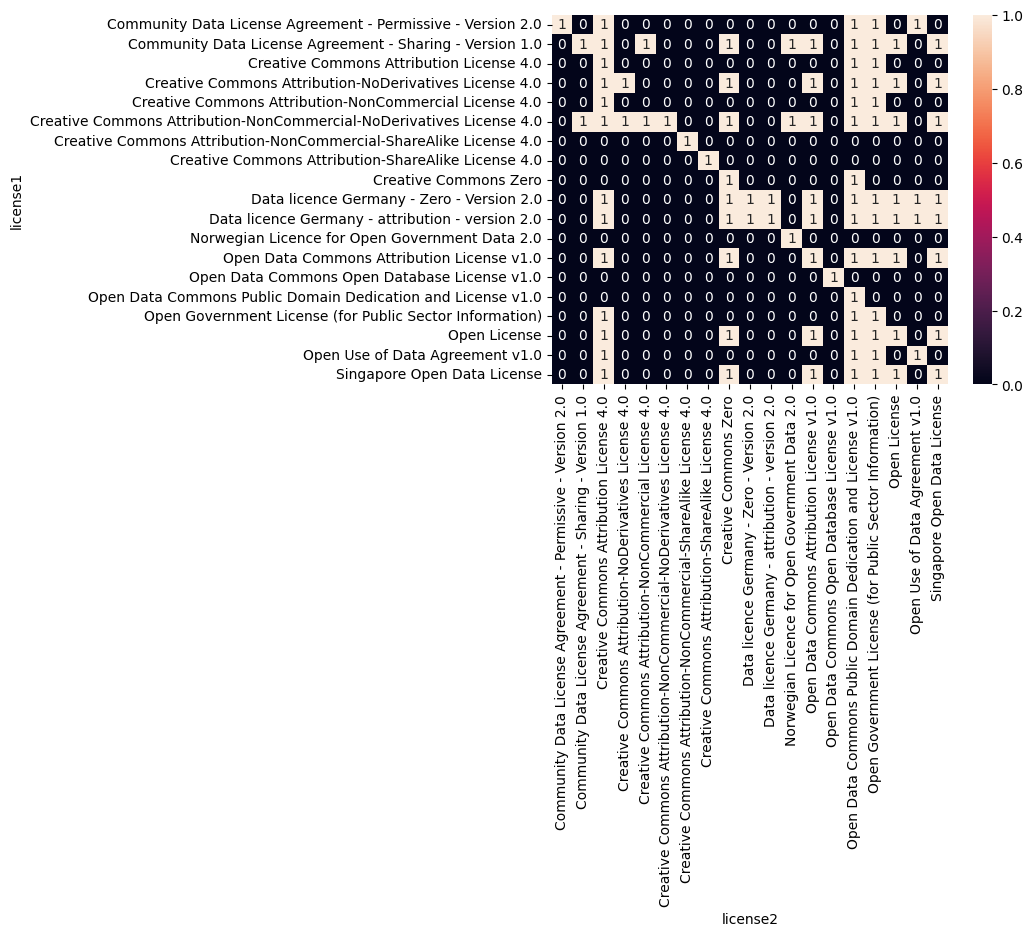

In [4]:
from logica.common import logica_lib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sn
import numpy

allLicenses = logica_lib.RunPredicateToPandas('../src/license_compatibility.l', 'AllLicenseCombinations', user_flags={'database_file':'../../data/backend.sqlite'});
compatibleCombinations = logica_lib.RunPredicateToPandas('../src/license_compatibility.l', 'AreCompatible', user_flags={'database_file':'../../data/backend.sqlite'});

def compatible(license1, license2):
    result = numpy.zeros(license1.shape)
    
    for i in range(0, len(license1)):
        result[i] = searchForEntry(license1[i], license2[i])

    return result

def searchForEntry(license1, license2):
    for _, compatiblePair in compatibleCombinations.iterrows():
        if compatiblePair.license1 == license1 and compatiblePair.license2 == license2:
            return 1

    return 0

allLicenses['compatible'] = compatible(allLicenses['license1'], allLicenses['license2'])

matrix = allLicenses.pivot(index='license1', columns='license2', values='compatible')

sn.heatmap(matrix, annot=True)
plt.show()

## Feedback
### Pros
* Good integration with Jupyter notebooks for testing
* Queries can be written based on defined logic

### Cons
* The code is already starting to get complicated. It would probably be easier to write the same statements using regular python code.
* The results are not correct:
  * Licenses are classified as not compatible with themselves
  * Open Domain licenses are not compatible with every license even though they don't restrict you in any way aside from some exclusions.
  * The matrix should be symmetric (it does not matter which license is stated first), so there is something wrong with the implementation.
